# NAMA = FITRI RAMADHINI
# NIM = 09011181722082


<div class="alert alert-info">
<h2> <center> Prediksi Tingkat Kerawanan Kebakaran di Daerah Kudus Menggunakan Fuzzy Mamdani
   

In [1]:
#memanggil library yang akan kita gunakan
#skfuzzy adalah library fuzzy logic pada python yang bekerja dengan numpy array

import numpy as np #import numpy, gunakan np untuk menggunakan library ini

import skfuzzy as fuzz #import library fuzzy, gunakan fuzz untuk menggunkaan library ini

from skfuzzy import control as ctrl #panggil library control dari skfuzzy, gunakan ctrl untuk menggunakan library ini

import matplotlib.pyplot as plt #panggil library matplotlib, gunakan plt untuk menggunakan library ini

Pada sistem fuzzy ini terdapat 3 input dan 1 output :

Input :
1. Jumlah Penduduk (Sedikit, Sedang, Banyak)
2. Luas Wilayah (Kecil, Sedang, Besar)
3. Curah Hujan (Sedikit, Sedang, Tinggi)

Output :
1. Tingkat Kerawanan (Rendah, Sedang, Tinggi)

In [2]:
Jumlah_Penduduk = ctrl.Antecedent(np.arange(1, 100000, 1000),'Jumlah Penduduk') 
#variabel Jumlah Penduduk dgn nilai 1 sampai 100000 dengan range 1000, Antecedent adalah library untuk 'Input'

Luas_Wilayah = ctrl.Antecedent(np.arange(1, 100, 1),'Luas Wilayah')
#variabel Luas Wilayah dgn nilai 1 sampai 100 dengan range 1, Antecedent adalah library untuk 'Input'

Curah_Hujan = ctrl.Antecedent(np.arange(1, 150, 0.5),'Curah Hujan')
#variabel Curah Hujan dgn nilai 1 sampai 150 dengan range o.5, Antecedent adalah library untuk 'Input' 

Tingkat_Kerawanan = ctrl.Consequent(np.arange(1, 150, 0.5),'Tingkat Kerawanan')
#variabel Tingkat Kerawanan dgn nilai 1 sampai 150 dengan range 0.5, Consequent adalah library untuk 'Output'

# Fuzzifikasi Jumlah Penduduk

Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

Untuk Jumlah Penduduk, fungsi keanggotaan dibagi menjadi 3 bagian yaitu:
$$ Jumlah Penduduk $$
$$ Sedikit = 1-70000$$
$$ Sedang = 50000-90000$$
$$ Banyak = 70000-100000$$


Dengan fungsi keanggotaan Jumlah Penduduk

\begin{equation}
  JumlahPenduduk['Sedikit'] = \mu JumlahPendudukSedikit(x)=\begin{cases}
    0, & \text{$x\geq 70000$}.\\
    (70000 - x)/(70000 - 50000) , & \text{$50000 < x < 70000$}.\\
    1, & \text{$0 \leq x\leq 50000$}.
  \end{cases}
  \\
  JumlahPenduduk['Sedang'] = \mu JumlahPendudukSedang(x)=\begin{cases}
    0, & \text{$50000 \geq x\geq 90000$}.\\
    (x - 50000)/(70000 - 50000) , & \text{$50000 < x < 70000$}.\\
    (90000 - x)/(90000 - 70000) , & \text{$70000 < x < 90000$}.\\
    1, & \text{$x = 50000$}.
  \end{cases}
  \\
    JumlahPenduduk['Banyak'] = \mu JumlahPendudukBanyak(x)=\begin{cases}
    0, & \text{$x\leq 70000$}.\\
    (x - 70000)/(90000 - 70000) , & \text{$70000 < x < 90000$}.\\
    1, & \text{$90000 \leq x$}.
  \end{cases}
\end{equation}



C:\Users\User\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


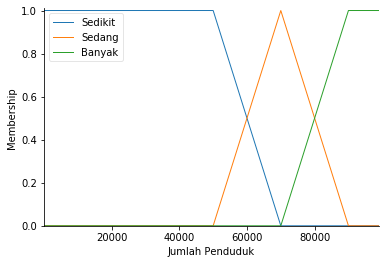

In [3]:
Jumlah_Penduduk['Sedikit'] = fuzz.trapmf(Jumlah_Penduduk.universe, [1, 1, 50000, 70000]) 
#membership function Sedikit, dalam bentuk trapesium dengan nilai 1 - 70000

Jumlah_Penduduk['Sedang'] = fuzz.trimf(Jumlah_Penduduk.universe, [50000, 70000, 90000])
#membership function Sedang, dalam bentuk segitiga dengan nilai 50000 - 90000

Jumlah_Penduduk['Banyak'] = fuzz.trapmf(Jumlah_Penduduk.universe, [70000, 90000, 100000, 100000])
#membership function Banyak, dalam bentuk trapesium dengan nilai 70000 - 100000

Jumlah_Penduduk.view() #Menampilkan grafik membership function Jumlah Penduduk

# Fuzzifikasi Luas Wilayah

Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

Untuk Luas Wilayah, fungsi keanggotaan dibagi menjadi 3 bagian yaitu:
$$ Luas Wilayah $$
$$ Kecil = 1-50$$
$$ Sedang = 25-75$$
$$ Besar = 50-100$$


Dengan fungsi keanggotaan Luas Wilayah

\begin{equation}
  LuasWilayah['Kecil'] = \mu LuasWilayahKecil(x)=\begin{cases}
    0, & \text{$x\geq 50$}.\\
    (50 - x)/(50 - 25) , & \text{$25 < x < 50$}.\\
    1, & \text{$0 \leq x\leq 25$}.
  \end{cases}
  \\
  LuasWilayah['Sedang'] = \mu LuasWilayahSedang(x)=\begin{cases}
    0, & \text{$25 \geq x\geq 75$}.\\
    (x - 25)/(50 - 25) , & \text{$25 < x < 50$}.\\
    (75 - x)/(75 - 50) , & \text{$50 < x < 75$}.\\
    1, & \text{$x = 50$}.
  \end{cases}
  \\
    LuasWilayah['Besar'] = \mu LuasWilayahBesar(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(75 - 50) , & \text{$50 < x < 75$}.\\
    1, & \text{$75 \leq x$}.
  \end{cases}
\end{equation}



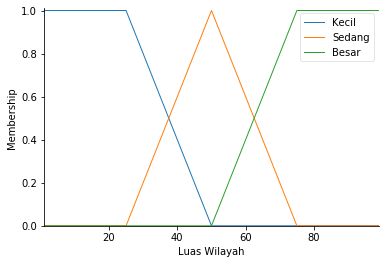

In [4]:
Luas_Wilayah['Kecil'] = fuzz.trapmf(Luas_Wilayah.universe, [1, 1, 25, 50])
#membership function Kecil, dalam bentuk trapesium dengan nilai 1 - 50

Luas_Wilayah['Sedang'] = fuzz.trimf(Luas_Wilayah.universe, [25, 50, 75])
#membership function Sedang, dalam bentuk segitiga dengan nilai 25 - 75

Luas_Wilayah['Besar'] = fuzz.trapmf(Luas_Wilayah.universe, [50, 75, 100, 100])
#membership function Besar, dalam bentuk trapesium dengan nilai 50 - 100

Luas_Wilayah.view() #Menampilkan grafik membership function Luas Wilayah

# Fuzzifikasi Curah Hujan

Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

Untuk Curah Hujan, fungsi keanggotaan dibagi menjadi 3 bagian yaitu:
$$ Curah Hujan $$
$$ Sedikit = 1-50$$
$$ Sedang = 10-100$$
$$ Tinggi = 50-150$$


Dengan fungsi keanggotaan Curah Hujan

\begin{equation}
  CurahHujan['Sedikit'] = \mu CurahHujanSedikit(x)=\begin{cases}
    0, & \text{$x\geq 50$}.\\
    (50 - x)/(50 - 10) , & \text{$10 < x < 50$}.\\
    1, & \text{$0 \leq x\leq 10$}.
  \end{cases}
  \\
  CurahHujan['Sedang'] = \mu CurahHujanSedang(x)=\begin{cases}
    0, & \text{$10 \geq x\geq 100$}.\\
    (x - 50)/(50 - 10) , & \text{$10 < x < 50$}.\\
    (100 - x)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x = 50$}.
  \end{cases}
  \\
    CurahHujan['Tinggi'] = \mu CurahHujanTinggi(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$100 \leq x$}.
  \end{cases}
\end{equation}



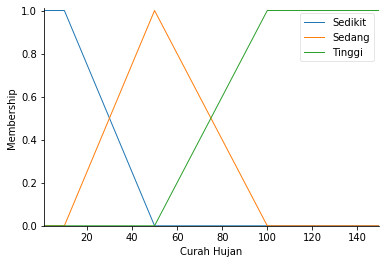

In [5]:
Curah_Hujan['Sedikit'] = fuzz.trapmf(Curah_Hujan.universe, [1, 1, 10, 50])
#membership function Sedikit, dalam bentuk trapesium dengan nilai 1 - 50

Curah_Hujan['Sedang'] = fuzz.trimf(Curah_Hujan.universe, [10, 50, 100])
#membership function Sedang, dalam bentuk segitiga dengan nilai 10 - 100

Curah_Hujan['Tinggi'] = fuzz.trapmf(Curah_Hujan.universe, [50, 100, 150, 150])
#membership function Tinggi, dalam bentuk trapesium dengan nilai 50 - 150

Curah_Hujan.view() #Menampilkan grafik membership function Curah Hujan

# Fuzzifikasi Tingkat Kerawanan

Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

Untuk Tingkat Kerawanan, fungsi keanggotaan dibagi menjadi 3 bagian yaitu:
$$ Tingkat Kerawanan$$
$$ Rendah = 1-50$$
$$ Sedang = 10-100$$
$$ Tinggi = 50-150$$


Dengan fungsi keanggotaan Tingkat Kerawanan

\begin{equation}
  TingkatKerawanan['Rendah'] = \mu TingkatKerawananRendah(x)=\begin{cases}
    0, & \text{$x\geq 50$}.\\
    (50 - x)/(50 - 10) , & \text{$10 < x < 50$}.\\
    1, & \text{$0 \leq x\leq 10$}.
  \end{cases}
  \\
  TingkatKerawanan['Sedang'] = \mu TingkatKerawananSedang(x)=\begin{cases}
    0, & \text{$10 \geq x\geq 100$}.\\
    (x - 50)/(50 - 10) , & \text{$10 < x < 50$}.\\
    (100 - x)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x = 50$}.
  \end{cases}
  \\
    TingkatKerawanan['Tinggi'] = \mu TingkatKerawananTinggi(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$100 \leq x$}.
  \end{cases}
\end{equation}



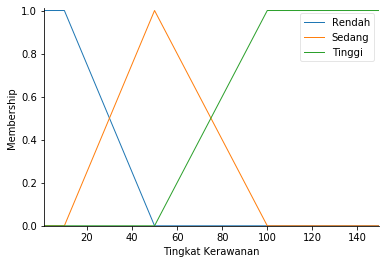

In [6]:
Tingkat_Kerawanan['Rendah'] = fuzz.trapmf(Tingkat_Kerawanan.universe, [1, 1, 10, 50])
#membership function Rendah, dalam bentuk trapesium dengan nilai 1 - 50

Tingkat_Kerawanan['Sedang'] = fuzz.trimf(Tingkat_Kerawanan.universe, [10, 50, 100])
#membership function Sedang, dalam bentuk segitiga dengan nilai 10 - 100

Tingkat_Kerawanan['Tinggi'] = fuzz.trapmf(Tingkat_Kerawanan.universe, [50, 100, 150, 150])
#membership function Tinggi, dalam bentuk trapesium dengan nilai 50 - 150

Tingkat_Kerawanan.view() #Menampilkan grafik membership function Tingkat Kerawanan

<div class="alert alert-info">
<h2> <center> Rules Base

Pada tahap ini, akan dibuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....

Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel Jumlah Penduduk yang berjumlah 3, fuzzifikasi dari variabel Luas Wilayah yang berjumlah 3, dan fuzzifikasi dari variabel Curah Hujan berjumlah 3, maka rule yang dapat dibuat berjumlah 3x3x3 = 27 rule.

1. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "KECIL" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "SEDANG"
2. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "KECIL" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"
3. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "KECIL" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "RENDAH"
4. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "SEDANG" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "TINGGI"
5. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "SEDANG" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"
6. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "SEDANG" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "RENDAH"
7. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "BESAR" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "SEDANG"
8. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "BESAR" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"
9. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "BESAR" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "RENDAH"
10. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "KECIL" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "TINGGI"
11. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "KECIL" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"
12. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "KECIL" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "RENDAH"
13. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "SEDANG" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "TINGGI"
14. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "SEDANG" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"
15. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "SEDANG" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "RENDAH"
16. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "BESAR" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "TINGGI"
17. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "BESAR" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"
18. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "BESAR" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "RENDAH"
19. IF Jumlah Penduduk "BANYAK" AND Luas Wilayah "KECIL" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "TINGGI"
20. IF Jumlah Penduduk "BANYAK" AND Luas Wilayah "KECIL" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"
21. IF Jumlah Penduduk "BANYAK" AND Luas Wilayah "KECIL" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "RENDAH"
22. IF Jumlah Penduduk "BANYAK" AND Luas Wilayah "SEDANG" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "TINGGI"
23. IF Jumlah Penduduk "BANYAK" AND Luas Wilayah "SEDANG" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"
24. IF Jumlah Penduduk "BANYAK" AND Luas Wilayah "SEDANG" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "RENDAH"
25. IF Jumlah Penduduk "BANYAK" AND Luas Wilayah "BESAR" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "SEDANG"
26. IF Jumlah Penduduk "BANYAK" AND Luas Wilayah "BESAR" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"
27. IF Jumlah Penduduk "BANYAK" AND Luas Wilayah "BESAR" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "TINGGI"

C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2121d6ce710>)

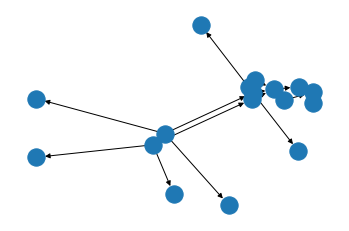

In [7]:
rule1 = ctrl.Rule(Jumlah_Penduduk['Sedikit'] & Luas_Wilayah['Kecil'] & Curah_Hujan['Sedikit'], Tingkat_Kerawanan['Sedang'])
rule2 = ctrl.Rule(Jumlah_Penduduk['Sedikit'] & Luas_Wilayah['Kecil'] & Curah_Hujan['Sedang'], Tingkat_Kerawanan['Sedang'])
rule3 = ctrl.Rule(Jumlah_Penduduk['Sedikit'] & Luas_Wilayah['Kecil'] & Curah_Hujan['Tinggi'], Tingkat_Kerawanan['Rendah'])
rule4 = ctrl.Rule(Jumlah_Penduduk['Sedikit'] & Luas_Wilayah['Sedang'] & Curah_Hujan['Sedikit'], Tingkat_Kerawanan['Tinggi'])
rule5 = ctrl.Rule(Jumlah_Penduduk['Sedikit'] & Luas_Wilayah['Sedang'] & Curah_Hujan['Sedang'], Tingkat_Kerawanan['Sedang'])
rule6 = ctrl.Rule(Jumlah_Penduduk['Sedikit'] & Luas_Wilayah['Sedang'] & Curah_Hujan['Tinggi'], Tingkat_Kerawanan['Rendah'])
rule7 = ctrl.Rule(Jumlah_Penduduk['Sedikit'] & Luas_Wilayah['Besar'] & Curah_Hujan['Sedikit'], Tingkat_Kerawanan['Sedang'])
rule8 = ctrl.Rule(Jumlah_Penduduk['Sedikit'] & Luas_Wilayah['Besar'] & Curah_Hujan['Sedang'], Tingkat_Kerawanan['Sedang'])
rule9 = ctrl.Rule(Jumlah_Penduduk['Sedikit'] & Luas_Wilayah['Besar'] & Curah_Hujan['Tinggi'], Tingkat_Kerawanan['Rendah'])
rule10 = ctrl.Rule(Jumlah_Penduduk['Sedang'] & Luas_Wilayah['Kecil'] & Curah_Hujan['Sedikit'], Tingkat_Kerawanan['Tinggi'])
rule11 = ctrl.Rule(Jumlah_Penduduk['Sedang'] & Luas_Wilayah['Kecil'] & Curah_Hujan['Sedang'], Tingkat_Kerawanan['Sedang'])
rule12 = ctrl.Rule(Jumlah_Penduduk['Sedang'] & Luas_Wilayah['Kecil'] & Curah_Hujan['Tinggi'], Tingkat_Kerawanan['Rendah'])
rule13 = ctrl.Rule(Jumlah_Penduduk['Sedang'] & Luas_Wilayah['Sedang'] & Curah_Hujan['Sedikit'], Tingkat_Kerawanan['Tinggi'])
rule14 = ctrl.Rule(Jumlah_Penduduk['Sedang'] & Luas_Wilayah['Sedang'] & Curah_Hujan['Sedang'], Tingkat_Kerawanan['Sedang'])
rule15 = ctrl.Rule(Jumlah_Penduduk['Sedang'] & Luas_Wilayah['Sedang'] & Curah_Hujan['Tinggi'], Tingkat_Kerawanan['Rendah'])
rule16 = ctrl.Rule(Jumlah_Penduduk['Sedang'] & Luas_Wilayah['Besar'] & Curah_Hujan['Sedikit'], Tingkat_Kerawanan['Tinggi'])
rule17 = ctrl.Rule(Jumlah_Penduduk['Sedang'] & Luas_Wilayah['Besar'] & Curah_Hujan['Sedang'], Tingkat_Kerawanan['Sedang'])
rule18 = ctrl.Rule(Jumlah_Penduduk['Sedang'] & Luas_Wilayah['Besar'] & Curah_Hujan['Tinggi'], Tingkat_Kerawanan['Rendah'])
rule19 = ctrl.Rule(Jumlah_Penduduk['Banyak'] & Luas_Wilayah['Kecil'] & Curah_Hujan['Sedikit'], Tingkat_Kerawanan['Tinggi'])
rule20 = ctrl.Rule(Jumlah_Penduduk['Banyak'] & Luas_Wilayah['Kecil'] & Curah_Hujan['Sedang'], Tingkat_Kerawanan['Sedang'])
rule21 = ctrl.Rule(Jumlah_Penduduk['Banyak'] & Luas_Wilayah['Kecil'] & Curah_Hujan['Tinggi'], Tingkat_Kerawanan['Rendah'])
rule22 = ctrl.Rule(Jumlah_Penduduk['Banyak'] & Luas_Wilayah['Sedang'] & Curah_Hujan['Sedikit'], Tingkat_Kerawanan['Tinggi'])
rule23 = ctrl.Rule(Jumlah_Penduduk['Banyak'] & Luas_Wilayah['Sedang'] & Curah_Hujan['Sedang'], Tingkat_Kerawanan['Sedang'])
rule24 = ctrl.Rule(Jumlah_Penduduk['Banyak'] & Luas_Wilayah['Sedang'] & Curah_Hujan['Tinggi'], Tingkat_Kerawanan['Rendah'])
rule25 = ctrl.Rule(Jumlah_Penduduk['Banyak'] & Luas_Wilayah['Besar'] & Curah_Hujan['Sedikit'], Tingkat_Kerawanan['Sedang'])
rule26 = ctrl.Rule(Jumlah_Penduduk['Banyak'] & Luas_Wilayah['Besar'] & Curah_Hujan['Sedang'], Tingkat_Kerawanan['Sedang'])
rule27 = ctrl.Rule(Jumlah_Penduduk['Banyak'] & Luas_Wilayah['Besar'] & Curah_Hujan['Tinggi'], Tingkat_Kerawanan['Tinggi'])

rule1.view()

<div class="alert alert-info">
<h2> <center> Rules Evaluation

In [8]:
Tingkat_Kerawanan_ctrl = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, 
     rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27])


<div class="alert alert-info">
<h2> <center> Defuzzifikasi

In [9]:
Kebakaran = ctrl.ControlSystemSimulation(Tingkat_Kerawanan_ctrl)

In [10]:
Kebakaran.input['Jumlah Penduduk'] = 60000 #Input Jumlah Penduduk
Kebakaran.input['Luas Wilayah'] = 70 #Input Luas Wilayah
Kebakaran.input['Curah Hujan'] = 100 #Input Curah Hujan

In [11]:
Kebakaran.compute() #Melakukan perhitungan defuzzifikasi

In [14]:
print(Kebakaran.output['Tingkat Kerawanan']) #Mencetak hasil output defuzzifikasi

20.927350427350436


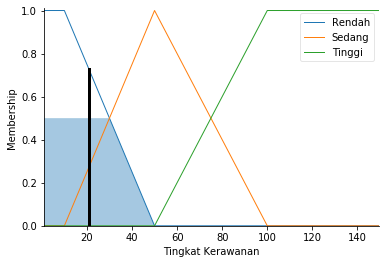

In [13]:
Tingkat_Kerawanan.view(sim=Kebakaran)
plt.show()


#Plotting fungsi keangggotaan Tingkat Kerawanan setelah dilakukan perhitungan defuzzifikasi

<div class="alert alert-info">
<h2> <center> Perhitungan Manual

Jumlah Penduduk = 60000.
Masukkan nilai Jumlah Penduduk ke dalam masing-masing fungsi keanggotaan Jumlah Penduduk

\begin{equation}
  JumlahPenduduk['Sedikit'] = \mu JumlahPendudukSedikit(x)=\begin{cases}
    0, & \text{$x\geq 70000$}.\\
    (70000 - x)/(70000 - 50000) , & \text{$50000 < x < 70000$}. \checkmark \\
    1, & \text{$0 \leq x\leq 50000$}.
  \end{cases}
  \\
  JumlahPenduduk['Sedang'] = \mu JumlahPendudukSedang(x)=\begin{cases}
    0, & \text{$50000 \geq x\geq 90000$}.\\
    (x - 50000)/(70000 - 50000) , & \text{$50000 < x < 70000$}.\checkmark \\
    (90000 - x)/(90000 - 70000) , & \text{$70000 < x < 90000$}.\\
    1, & \text{$x = 50000$}.
  \end{cases}
  \\
    JumlahPenduduk['Banyak'] = \mu JumlahPendudukBanyak(x)=\begin{cases}
    0, & \text{$x\leq 70000$}.\checkmark \\
    (x - 70000)/(90000 - 70000) , & \text{$70000 < x < 90000$}.\\
    1, & \text{$90000 \leq x$}.
  \end{cases}
\end{equation}



\begin{equation}
    \mu JumlahPendudukSedikit(60000) = (70000 - 60000) / (70000 - 50000) \\
    \mu JumlahPendudukSedikit(60000) = 10000/20000 \\ 
    \mu JumlahPendudukSedikit(60000) = 0.5 \\
    \mu JumlahPendudukSedang(60000) = (60000 - 50000) / (70000 - 50000) \\
    \mu JumlahPendudukSedang(60000) = 10000/20000 \\
    \mu JumlahPendudukSedang(60000) = 0.5 \\
    \mu JumlahPendudukBanyak(60000) = 0 \\
\end{equation}

Luas Wilayah = 70. Masukkan nilai Luas Wilayah ke dalam masing-masing fungsi keanggotaan Luas wilayah

\begin{equation}
  LuasWilayah['Kecil'] = \mu LuasWilayahKecil(x)=\begin{cases}
    0, & \text{$x\geq 50$}.\checkmark \\
    (50 - x)/(50 - 25) , & \text{$25 < x < 50$}.\\
    1, & \text{$0 \leq x\leq 25$}.
  \end{cases}
  \\
  LuasWilayah['Sedang'] = \mu LuasWilayahSedang(x)=\begin{cases}
    0, & \text{$25 \geq x\geq 75$}.\\
    (x - 25)/(50 - 25) , & \text{$25 < x < 50$}.\\
    (75 - x)/(75 - 50) , & \text{$50 < x < 75$}. \checkmark \\
    1, & \text{$x = 50$}.
  \end{cases}
  \\
    LuasWilayah['Besar'] = \mu LuasWilayahBesar(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(75 - 50) , & \text{$50 < x < 75$}.\checkmark \\
    1, & \text{$75 \leq x$}.
  \end{cases}
\end{equation}



\begin{equation}
    \mu LuasWilayahKecil(70) = 0 \\
    \mu LuasWilayahSedang(70) = (75 - 70) / (75 - 50) \\
    \mu LuasWilayahSedang(70) = 5/25 \\ 
    \mu LuasWilayahSedang(70) = 0.2 \\
    \mu LuasWilayahBesar(70) = (70 - 50) / (75 - 50) \\
    \mu LuasWilayahBesar(70) = 20/25 \\
    \mu LuasWilayahBesar(70) = 0.8 \\
\end{equation}

Curah Hujan = 100. Masukkan nilai Curah Hujan ke dalam masing-masing fungsi keanggotaan Curah Hujan.

\begin{equation}
  CurahHujan['Sedikit'] = \mu CurahHujanSedikit(x)=\begin{cases}
    0, & \text{$x\geq 50$}.\checkmark \\
    (50 - x)/(50 - 10) , & \text{$10 < x < 50$}.\\
    1, & \text{$0 \leq x\leq 10$}.
  \end{cases}
  \\
  CurahHujan['Sedang'] = \mu CurahHujanSedang(x)=\begin{cases}
    0, & \text{$10 \geq x\geq 100$}.\checkmark \\
    (x - 50)/(50 - 10) , & \text{$10 < x < 50$}.\\
    (100 - x)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x = 50$}.
  \end{cases}
  \\
    CurahHujan['Tinggi'] = \mu CurahHujanTinggi(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$100 \leq x$}.\checkmark 
  \end{cases}
\end{equation}



\begin{equation}
    \mu CurahHujanSedikit(100) = 0\\
     \mu CurahHujanSedang(100) = 0\\
    \mu CurahHujanTinggi(100) = 1\\
\end{equation}

Lalu kita cari nilai z untuk setiap aturan dengan menggunakan fungsi MIN karena menggunakan rule AND

1. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "KECIL" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "SEDANG"

$$ \\ \alpha(predikat_1) = \mu JumlahPendudukSedikit \cap \mu LuasWilayahKecil \cap \mu CurahHujanSedikit $$
$$\alpha(predikat_1)   = min (\mu JumlahPendudukSedikit[60000], \mu LuasWilayahKecil[70], \mu CurahHujanSedikit[100]) $$
$$ \alpha(predikat_1) = min (0.5;0;0) $$
$$ \alpha(predikat_1) = 0 $$

Lalu lihat himpunan Tingkat Kerawanan Sedang 
$$
    TingkatKerawanan['Sedang'] = \mu(x)=\begin{cases}
    0, & \text{$10 \geq x\geq 100$}.\\
    (x - 50)/(50 - 10) , & \text{$10 < x < 50$}.\\
    (100 - x)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x = 50$}.
  \end{cases}
 $$
Maka nilai $ Z_1 = 0 $

=================================================================================================================

2. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "KECIL" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"

$$ \\ \alpha(predikat_2) = \mu JumlahPendudukSedikit \cap \mu LuasWilayahKecil \cap \mu CurahHujanSedang $$
$$\alpha(predikat_2)   = min (\mu JumlahPendudukSedikit[60000], \mu LuasWilayahKecil[70], \mu CurahHujanSedang[100]) $$
$$ \alpha(predikat_2) = min (0.5;0;0) $$
$$ \alpha(predikat_2) = 0 $$

Lalu lihat himpunan Tingkat Kerawanan Sedang 
$$
    TingkatKerawanan['Sedang'] = \mu(x)=\begin{cases}
    0, & \text{$10 \geq x\geq 100$}.\\
    (x - 50)/(50 - 10) , & \text{$10 < x < 50$}.\\
    (100 - x)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x = 50$}.
  \end{cases}
 $$
 Maka nilai $ Z_2 = 0 $

=================================================================================================================

3. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "KECIL" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "RENDAH"

$$ \\ \alpha(predikat_3) = \mu JumlahPendudukSedikit \cap \mu LuasWilayahKecil \cap \mu CurahHujanTinggi $$
$$\alpha(predikat_3)   = min (\mu JumlahPendudukSedikit[60000], \mu LuasWilayahKecil[70], \mu CurahHujanTinggi[100]) $$
$$ \alpha(predikat_3) = min (0.5;0;1) $$
$$ \alpha(predikat_3) = 0 $$

Lalu lihat himpunan Tingkat Kerawanan Rendah 
$$
     TingkatKerawanan['Rendah'] = \mu (x)=\begin{cases}
    0, & \text{$x\geq 50$}.\\
    (50 - x)/(50 - 10) , & \text{$10 < x < 50$}.\\
    1, & \text{$0 \leq x\leq 10$}.
  \end{cases}
 $$
 Maka nilai $ Z_3 = 0 $
 
=================================================================================================================

4. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "SEDANG" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "TINGGI"

$$ \\ \alpha(predikat_4) = \mu JumlahPendudukSedikit \cap \mu LuasWilayahSedang \cap \mu CurahHujanSedikit $$
$$\alpha(predikat_4)   = min (\mu JumlahPendudukSedikit[60000], \mu LuasWilayahSedang[70], \mu CurahHujanSedikit[100]) $$
$$ \alpha(predikat_4) = min (0.5;0.2;0) $$
$$ \alpha(predikat_4) = 0 $$

Lalu lihat himpunan Tingkat Kerawanan Tinggi
$$ TingkatKerawanan['Tinggi'] = \mu (x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$100 \leq x$}.
  \end{cases}
$$

Maka nilai $Z_4 = 0


=================================================================================================================
5. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "SEDANG" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"

$$ \\ \alpha(predikat_5) = \mu JumlahPendudukSedikit \cap \mu LuasWilayahSedang \cap \mu CurahHujanSedang $$
$$\alpha(predikat_5)   = min (\mu JumlahPendudukSedikit[60000], \mu LuasWilayahSedang[70], \mu CurahHujanSedang[100]) $$
$$ \alpha(predikat_5) = min (0.5;0.2;0) $$
$$ \alpha(predikat_5) = 0 $$

Lalu lihat himpunan Tingkat Kerawanan Sedang
$$
    TingkatKerawanan['Sedang'] = \mu(x)=\begin{cases}
    0, & \text{$10 \geq x\geq 100$}.\\
    (x - 50)/(50 - 10) , & \text{$10 < x < 50$}.\\
    (100 - x)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x = 50$}.
  \end{cases}
$$

Maka nilai Z$_5$ = 0

=================================================================================================================

6. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "SEDANG" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "RENDAH"

$$ \\ \alpha(predikat_6) = \mu JumlahPendudukSedikit \cap \mu LuasWilayahSedang \cap \mu CurahHujanTinggi $$
$$\alpha(predikat_6)   = min (\mu JumlahPendudukSedikit[60000], \mu LuasWilayahSedang[70], \mu CurahHujanTinggi[100]) $$
$$ \alpha(predikat_6) = min (0.5;0.2;1) $$
$$ \alpha(predikat_6) = 0.2 $$

Lalu lihat himpunan Tingkat Kerawanan Rendah 
$$
     TingkatKerawanan['Rendah'] = \mu (x)=\begin{cases}
    0, & \text{$x\geq 50$}.\\
    (50 - x)/(50 - 10) , & \text{$10 < x < 50$}.\\
    1, & \text{$0 \leq x\leq 10$}.
  \end{cases}
$$

Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya

$$
(50-x) / (50-10) = 0.2 \\
(50-x) = 0.2 x 40 \\
(50-x) = 8 \\
x = 42 \\
$$

Maka nilai Z$_6$ = 42


=================================================================================================================

7. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "BESAR" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "SEDANG"
$$ \\ \alpha(predikat_7) = \mu JumlahPendudukSedikit \cap \mu LuasWilayahBesar \cap \mu CurahHujanSedikit $$
$$\alpha(predikat_7)   = min (\mu JumlahPendudukSedikit[60000], \mu LuasWilayahBesar[70], \mu CurahHujanSedikit[100]) $$
$$ \alpha(predikat_7) = min (0.5;0.8;0) $$
$$ \alpha(predikat_7) = 0 $$

Lalu lihat himpunan Tingkat Kerawanan Sedang
$$
    TingkatKerawanan['Sedang'] = \mu(x)=\begin{cases}
    0, & \text{$10 \geq x\geq 100$}.\\
    (x - 50)/(50 - 10) , & \text{$10 < x < 50$}.\\
    (100 - x)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x = 50$}.
  \end{cases}
$$

Maka nilai Z$_7$ = 0

=================================================================================================================

8. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "BESAR" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"
$$ \\ \alpha(predikat_8) = \mu JumlahPendudukSedikit \cap \mu LuasWilayahBesar \cap \mu CurahHujanSedang $$
$$\alpha(predikat_8)   = min (\mu JumlahPendudukSedikit[60000], \mu LuasWilayahBesar[70], \mu CurahHujanSedang[100]) $$
$$ \alpha(predikat_8) = min (0.5;0.8;0) $$
$$ \alpha(predikat_8) = 0 $$

Lalu lihat himpunan Tingkat Kerawanan Sedang
$$
    TingkatKerawanan['Sedang'] = \mu(x)=\begin{cases}
    0, & \text{$10 \geq x\geq 100$}.\\
    (x - 50)/(50 - 10) , & \text{$10 < x < 50$}.\\
    (100 - x)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x = 50$}.
  \end{cases}
$$

Maka nilai Z$_8$ = 0

=================================================================================================================

9. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "BESAR" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "RENDAH"
$$ \\ \alpha(predikat_9) = \mu JumlahPendudukSedikit \cap \mu LuasWilayahBesar \cap \mu CurahHujanTinggi $$
$$\alpha(predikat_9)   = min (\mu JumlahPendudukSedikit[60000], \mu LuasWilayahBesar[70], \mu CurahHujanTinggi[100]) $$
$$ \alpha(predikat_9) = min (0.5;0.8;1) $$
$$ \alpha(predikat_9) = 0.5 $$

Lalu lihat himpunan Tingkat Kerawanan Rendah 
$$
     TingkatKerawanan['Rendah'] = \mu (x)=\begin{cases}
    0, & \text{$x\geq 50$}.\\
    (50 - x)/(50 - 10) , & \text{$10 < x < 50$}.\\
    1, & \text{$0 \leq x\leq 10$}.
  \end{cases}
$$

Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya
$$
(50-x)/(50-10) = 0.5 \\
(50-x) = 0.5 x 40 \\
(50-x) = 20 \\
x = 30 \\
$$
Maka nilai Z$_9$ = 30

=================================================================================================================

10. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "KECIL" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "TINGGI"

$$ \\ \alpha(predikat_1\,_0) = \mu JumlahPendudukSedang \cap \mu LuasWilayahKecil \cap \mu CurahHujanSedikit $$
$$\alpha(predikat_1\,_0)   = min (\mu JumlahPendudukSedang[60000], \mu LuasWilayahKecil[70], \mu CurahHujanSedikit[100]) $$
$$ \alpha(predikat_1\,_0) = min (0.5;0;0) $$
$$ \alpha(predikat_1\,_0) = 0 $$

Lalu lihat himpunan Tingkat Kerawanan Tinggi
$$
    TingkatKerawanan['Tinggi'] = \mu TingkatKerawananTinggi(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$100 \leq x$}.
  \end{cases}
$$

Maka nilai Z$_1$$_0$ = 0

=================================================================================================================

11. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "KECIL" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"
$$ \\ \alpha(predikat_1\,_1) = \mu JumlahPendudukSedang \cap \mu LuasWilayahKecil \cap \mu CurahHujanSedang $$
$$\alpha(predikat_1\,_1)   = min (\mu JumlahPendudukSedang[60000], \mu LuasWilayahKecil[70], \mu CurahHujanSedang[100]) $$
$$ \alpha(predikat_1\,_1) = min (0.5;0;0) $$
$$ \alpha(predikat_1\,_1) = 0 $$

Lalu lihat himpunan Tingkat Kerawanan Sedang
$$
    TingkatKerawanan['Sedang'] = \mu TingkatKerawananSedang(x)=\begin{cases}
    0, & \text{$10 \geq x\geq 100$}.\\
    (x - 50)/(50 - 10) , & \text{$10 < x < 50$}.\\
    (100 - x)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x = 50$}.
  \end{cases}
$$

Maka nilai Z$_1$$_1$ = 0

=================================================================================================================

12. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "KECIL" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "RENDAH"
$$ \\ \alpha(predikat_1\,_2) = \mu JumlahPendudukSedang \cap \mu LuasWilayahKecil \cap \mu CurahHujanTinggi $$
$$\alpha(predikat_1\,_2)   = min (\mu JumlahPendudukSedang[60000], \mu LuasWilayahKecil[70], \mu CurahHujanTinggi[100]) $$
$$ \alpha(predikat_1\,_2) = min (0.5;0;1) $$
$$ \alpha(predikat_1\,_2) = 0 $$

Lalu lihat Tingkat Kerawanan Rendah
$$
    TingkatKerawanan['Rendah'] = \mu TingkatKerawananRendah(x)=\begin{cases}
    0, & \text{$x\geq 50$}.\\
    (50 - x)/(50 - 10) , & \text{$10 < x < 50$}.\\
    1, & \text{$0 \leq x\leq 10$}.
  \end{cases}
$$

Maka nilai Z$_1$$_2$ = 0

=================================================================================================================
13. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "SEDANG" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "TINGGI"
$$ \\ \alpha(predikat_1\_3) = \mu JumlahPendudukSedang \cap \mu LuasWilayahSedang \cap \mu CurahHujanSedikit $$
$$\alpha(predikat_1\_3)   = min (\mu JumlahPendudukSedang[60000], \mu LuasWilayahSedang[70], \mu CurahHujanSedikit[100]) $$
$$ \alpha(predikat_1\,_3) = min (0.5;0.2;0) $$
$$ \alpha(predikat_1\,_3) = 0 $$

Lalu lihat Tingkat Kerawanan Tinggi
$$ 
    TingkatKerawanan['Tinggi'] = \mu TingkatKerawananTinggi(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$100 \leq x$}.
  \end{cases}
$$

Maka nilai Z$_1$$_3$ = 0

=================================================================================================================
14. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "SEDANG" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"
$$ \\ \alpha(predikat_1\_4) = \mu JumlahPendudukSedang \cap \mu LuasWilayahSedang \cap \mu CurahHujanSedang $$
$$\alpha(predikat_1\_4)   = min (\mu JumlahPendudukSedang[60000], \mu LuasWilayahSedang[70], \mu CurahHujanSedang[100]) $$
$$ \alpha(predikat_1\,_4) = min (0.5;0.2;0) $$
$$ \alpha(predikat_1\,_4) = 0 $$

Lalu lihat Tingkat Kerawanan Sedang
$$
 TingkatKerawanan['Sedang'] = \mu TingkatKerawananSedang(x)=\begin{cases}
    0, & \text{$10 \geq x\geq 100$}.\\
    (x - 50)/(50 - 10) , & \text{$10 < x < 50$}.\\
    (100 - x)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x = 50$}.
  \end{cases}
$$
Maka nilai Z$_1$$_4$ = 0

=================================================================================================================
15. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "SEDANG" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "RENDAH"
$$ \\ \alpha(predikat_1\_5) = \mu JumlahPendudukSedang \cap \mu LuasWilayahSedang \cap \mu CurahHujanTinggi $$
$$\alpha(predikat_1\_5)   = min (\mu JumlahPendudukSedang[60000], \mu LuasWilayahSedang[70], \mu CurahHujanTinggi[100]) $$
$$ \alpha(predikat_1\,_5) = min (0.5;0.2;1) $$
$$ \alpha(predikat_1\,_5) = 0.2 $$

Lalu lihat Tingkat Kerawanan Rendah
$$
 TingkatKerawanan['Rendah'] = \mu TingkatKerawananRendah(x)=\begin{cases}
    0, & \text{$x\geq 50$}.\\
    (50 - x)/(50 - 10) , & \text{$10 < x < 50$}.\\
    1, & \text{$0 \leq x\leq 10$}.
  \end{cases}
$$

Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya
$$
(50-x) / (50-10) = 0.2 \\
(50-x) = 8 \\ 
x = 42 \\
$$
Maka nilai Z$_1$$_5$ = 42

=================================================================================================================
16. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "BESAR" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "TINGGI"
$$ \\ \alpha(predikat_1\_6) = \mu JumlahPendudukSedang \cap \mu LuasWilayahBesar \cap \mu CurahHujanSedikit $$
$$\alpha(predikat_1\_6)   = min (\mu JumlahPendudukSedang[60000], \mu LuasWilayahBesar[70], \mu CurahHujanSedikit[100]) $$
$$ \alpha(predikat_1\,_6) = min (0.5;0.8;0) $$
$$ \alpha(predikat_1\,_6) = 0 $$

Lalu lihat Tingkat Kerawanan Tinggi
$$
   TingkatKerawanan['Tinggi'] = \mu TingkatKerawananTinggi(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$100 \leq x$}.
  \end{cases}
$$
Maka nilai Z$_1$$_6$ = 0

=================================================================================================================
17. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "BESAR" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"
$$ \\ \alpha(predikat_1\_7) = \mu JumlahPendudukSedang \cap \mu LuasWilayahBesar \cap \mu CurahHujanSedang $$
$$\alpha(predikat_1\_7)   = min (\mu JumlahPendudukSedang[60000], \mu LuasWilayahBesar[70], \mu CurahHujanSedang[100]) $$
$$ \alpha(predikat_1\,_7) = min (0.5;0.8;0) $$
$$ \alpha(predikat_1\,_7) = 0 $$

Lalu lihat Tingkat Kerawanan Sedang
$$
    TingkatKerawanan['Sedang'] = \mu TingkatKerawananSedang(x)=\begin{cases}
    0, & \text{$10 \geq x\geq 100$}.\\
    (x - 50)/(50 - 10) , & \text{$10 < x < 50$}.\\
    (100 - x)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x = 50$}.
  \end{cases}
$$
Maka nilai Z$_1$$_7$ = 0

=================================================================================================================
18. IF Jumlah Penduduk "SEDANG" AND Luas Wilayah "BESAR" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "RENDAH"
$$ \\ \alpha(predikat_1\_8) = \mu JumlahPendudukSedang \cap \mu LuasWilayahBesar \cap \mu CurahHujanTinggi $$
$$\alpha(predikat_1\_8)   = min (\mu JumlahPendudukSedang[60000], \mu LuasWilayahBesar[70], \mu CurahHujanTinggi[100]) $$
$$ \alpha(predikat_1\,_8) = min (0.5;0.8;1) $$
$$ \alpha(predikat_1\,_8) = 0.5 $$

Lalu lihat Tingkat Kerawanan Rendah
$$
    TingkatKerawanan['Rendah'] = \mu TingkatKerawananRendah(x)=\begin{cases}
    0, & \text{$x\geq 50$}.\\
    (50 - x)/(50 - 10) , & \text{$10 < x < 50$}.\\
    1, & \text{$0 \leq x\leq 10$}.
  \end{cases}
$$

Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya
$$
(50-x) / (50-10) = 0.5 \\
(50-x) = 20 \\ 
x = 30 \\
$$
Maka nilai Z$_1$$_8$ = 30

=================================================================================================================
19. IF Jumlah Penduduk "BANYAK" AND Luas Wilayah "KECIL" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "TINGGI"
$$ \\ \alpha(predikat_1\_9) = \mu JumlahPendudukBanyak \cap \mu LuasWilayahKecil \cap \mu CurahHujanSedikit $$
$$\alpha(predikat_1\_9)   = min (\mu JumlahPendudukBanyak[60000], \mu LuasWilayahKecil[70], \mu CurahHujanSedikit[100]) $$
$$ \alpha(predikat_1\,_9) = min (0;0;0) $$
$$ \alpha(predikat_1\,_9) = 0 $$

Lalu lihat Tingkat Kerawanan Tinggi
$$
    TingkatKerawanan['Tinggi'] = \mu TingkatKerawananTinggi(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$100 \leq x$}.
  \end{cases}
$$

Maka nilai Z$_1$$_9$ = 0

=================================================================================================================
20. IF Jumlah Penduduk "BANYAK" AND Luas Wilayah "KECIL" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"
$$ \\ \alpha(predikat_2\_0) = \mu JumlahPendudukBanyak \cap \mu LuasWilayahKecil \cap \mu CurahHujanSedang $$
$$\alpha(predikat_2\_0)   = min (\mu JumlahPendudukBanyak[60000], \mu LuasWilayahKecil[70], \mu CurahHujanSedang[100]) $$
$$ \alpha(predikat_2\,_0) = min (0;0;0) $$
$$ \alpha(predikat_2\,_0) = 0 $$

Lalu lihat Tingkat Kerawanan Sedang
$$
    TingkatKerawanan['Sedang'] = \mu TingkatKerawananSedang(x)=\begin{cases}
    0, & \text{$10 \geq x\geq 100$}.\\
    (x - 50)/(50 - 10) , & \text{$10 < x < 50$}.\\
    (100 - x)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x = 50$}.
  \end{cases}
$$
Maka nilai Z$_2$$_0$ = 0

=================================================================================================================
21. IF Jumlah Penduduk "BANYAK" AND Luas Wilayah "KECIL" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "RENDAH"
$$ \\ \alpha(predikat_2\_1) = \mu JumlahPendudukBanyak \cap \mu LuasWilayahKecil \cap \mu CurahHujanTinggi $$
$$\alpha(predikat_2\_1)   = min (\mu JumlahPendudukBanyak[60000], \mu LuasWilayahKecil[70], \mu CurahHujanTinggi[100]) $$
$$ \alpha(predikat_2\,_1) = min (0;0;1) $$
$$ \alpha(predikat_2\,_1) = 0 $$

Lalu lihat Tingkat Kerawanan Rendah
$$
    TingkatKerawanan['Rendah'] = \mu TingkatKerawananRendah(x)=\begin{cases}
    0, & \text{$x\geq 50$}.\\
    (50 - x)/(50 - 10) , & \text{$10 < x < 50$}.\\
    1, & \text{$0 \leq x\leq 10$}.
  \end{cases}
$$
Maka nilai Z$_2$$_1$ = 0
  
=================================================================================================================
22. IF Jumlah Penduduk "SEDIKIT" AND Luas Wilayah "SEDANG" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "TINGGI"
$$ \\ \alpha(predikat_2\_2) = \mu JumlahPendudukBanyak \cap \mu LuasWilayahSedang \cap \mu CurahHujanSedikit $$
$$\alpha(predikat_2\_2)   = min (\mu JumlahPendudukBanyak[60000], \mu LuasWilayahSedang[70], \mu CurahHujanSedikit[100]) $$
$$ \alpha(predikat_2\,_2) = min (0;0.2;0) $$
$$ \alpha(predikat_2\,_2) = 0 $$

Lalu lihat Tingkat Kerawanan Tinggi
$$
    TingkatKerawanan['Tinggi'] = \mu TingkatKerawananTinggi(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$100 \leq x$}.
  \end{cases}
$$
Maka nilai Z$_2$$_2$ = 0

=================================================================================================================
23. IF Jumlah Penduduk "BANYAK" AND Luas Wilayah "SEDANG" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"
$$ \\ \alpha(predikat_2\_3) = \mu JumlahPendudukBanyak \cap \mu LuasWilayahSedang \cap \mu CurahHujanSedang $$
$$\alpha(predikat_2\_3)   = min (\mu JumlahPendudukBanyak[60000], \mu LuasWilayahSedang[70], \mu CurahHujanSedang[100]) $$
$$ \alpha(predikat_2\,_3) = min (0;0.2;0) $$
$$ \alpha(predikat_2\,_3) = 0 $$

Lalu lihat Tingkat Kerawanan Sedang
$$
    TingkatKerawanan['Sedang'] = \mu TingkatKerawananSedang(x)=\begin{cases}
    0, & \text{$10 \geq x\geq 100$}.\\
    (x - 50)/(50 - 10) , & \text{$10 < x < 50$}.\\
    (100 - x)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x = 50$}.
  \end{cases}
$$
Maka nilai Z$_2$$_3$ = 0

=================================================================================================================
24. IF Jumlah Penduduk "BANYAK" AND Luas Wilayah "SEDANG" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "RENDAH"
$$ \\ \alpha(predikat_2\_4) = \mu JumlahPendudukBanyak \cap \mu LuasWilayahSedang \cap \mu CurahHujanTinggi $$
$$\alpha(predikat_2\_4)   = min (\mu JumlahPendudukBanyak[60000], \mu LuasWilayahSedang[70], \mu CurahHujanTinggi[100]) $$
$$ \alpha(predikat_2\,_4) = min (0;0.2;1) $$
$$ \alpha(predikat_2\,_4) = 0 $$

Lalu lihat Tingkat Kerawanan Rendah
$$
    TingkatKerawanan['Rendah'] = \mu TingkatKerawananRendah(x)=\begin{cases}
    0, & \text{$x\geq 50$}.\\
    (50 - x)/(50 - 10) , & \text{$10 < x < 50$}.\\
    1, & \text{$0 \leq x\leq 10$}.
  \end{cases}
$$
Maka nilai Z$_2$$_4$ = 0

=================================================================================================================
25. IF Jumlah Penduduk "BANYAK" AND Luas Wilayah "BESAR" AND Curah Hujan "SEDIKIT" THEN Tingkat Kerawanan "SEDANG"
$$ \\ \alpha(predikat_2\_5) = \mu JumlahPendudukBanyak \cap \mu LuasWilayahBesar \cap \mu CurahHujanSedikit $$
$$\alpha(predikat_2\_5)   = min (\mu JumlahPendudukBanyak[60000], \mu LuasWilayahBesar[70], \mu CurahHujanSedikit[100]) $$
$$ \alpha(predikat_2\,_5) = min (0;0.8;0) $$
$$ \alpha(predikat_2\,_5) = 0 $$

Lalu lihat Tingkat Kerawanan Sedang
$$
    TingkatKerawanan['Sedang'] = \mu TingkatKerawananSedang(x)=\begin{cases}
    0, & \text{$10 \geq x\geq 100$}.\\
    (x - 50)/(50 - 10) , & \text{$10 < x < 50$}.\\
    (100 - x)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x = 50$}.
  \end{cases}
$$
Maka nilai Z$_2$$_5$ = 0

=================================================================================================================
26. IF Jumlah Penduduk "BANYAK" AND Luas Wilayah "BESAR" AND Curah Hujan "SEDANG" THEN Tingkat Kerawanan "SEDANG"
$$ \\ \alpha(predikat_2\_6) = \mu JumlahPendudukBanyak \cap \mu LuasWilayahBesar \cap \mu CurahHujanSedang $$
$$\alpha(predikat_2\_6)   = min (\mu JumlahPendudukBanyak[60000], \mu LuasWilayahBesar[70], \mu CurahHujanSedang[100]) $$
$$ \alpha(predikat_2\,_6) = min (0;0.8;0) $$
$$ \alpha(predikat_2\,_6) = 0 $$

Lalu lihat Tingkat Kerawanan Sedang
$$
    TingkatKerawanan['Sedang'] = \mu TingkatKerawananSedang(x)=\begin{cases}
    0, & \text{$10 \geq x\geq 100$}.\\
    (x - 50)/(50 - 10) , & \text{$10 < x < 50$}.\\
    (100 - x)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x = 50$}.
  \end{cases}
$$
Maka nilai Z$_2$$_6$ = 0

=================================================================================================================
27. IF Jumlah Penduduk "BANYAK" AND Luas Wilayah "BESAR" AND Curah Hujan "TINGGI" THEN Tingkat Kerawanan "TINGGI"
$$ \\ \alpha(predikat_2\_7) = \mu JumlahPendudukBanyak \cap \mu LuasWilayahBesar \cap \mu CurahHujanTinggi $$
$$\alpha(predikat_2\_7)   = min (\mu JumlahPendudukBanyak[60000], \mu LuasWilayahBesar[70], \mu CurahHujanTinggi[100]) $$
$$ \alpha(predikat_2\,_7) = min (0;0.8;1) $$
$$ \alpha(predikat_2\,_7) = 0 $$

Lalu lihat Tingkat Kerawanan Tinggi
$$
    TingkatKerawanan['Tinggi'] = \mu TingkatKerawananTinggi(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$100 \leq x$}.
  \end{cases}
$$
Maka nilai Z$_2$$_7$ = 0


Dari sini, kita dapat mencari nilai z, yaitu:

Z =$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 +
\alpha predikat_1\,_0 \times Z_1\,_0 +
\alpha predikat_1\,_1 \times Z_1\,_1 +
\alpha predikat_1\,_2 \times Z_1\,_2 +
\alpha predikat_1\,_3 \times Z_1\,_3 +
\alpha predikat_1\,_4 \times Z_1\,_4 +
\alpha predikat_1\,_5 \times Z_1\,_5 +
\alpha predikat_1\,_6 \times Z_1\,_6 +
\alpha predikat_1\,_7 \times Z_1\,_7 +
\alpha predikat_1\,_8 \times Z_1\,_8 +
\alpha predikat_1\,_9 \times Z_1\,_9 +
\alpha predikat_2\,_0 \times Z_2\,_0 +
\alpha predikat_2\,_1\times Z_2\,_1 +
\alpha predikat_2\,_2 \times Z_2\,_2 +
\alpha predikat_2\,_3 \times Z_2\,_3 +
\alpha predikat_2\,_4 \times Z_2\,_4 +
\alpha predikat_2\,_5 \times Z_2\,_5 +
\alpha predikat_2\,_6 \times Z_2\,_6 +
\alpha predikat_2\,_7 \times Z_2\,_7 +}
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9 + \alpha predikat_1\,_0 +
\alpha predikat_1\,_1 + \alpha predikat_1\,_2 + 
\alpha predikat_1\,_3 + \alpha predikat_1\,_4 + 
\alpha predikat_1\,_5 + \alpha predikat_1\,_6 +
\alpha predikat_1\,_7 + \alpha predikat_1\,_8 +
\alpha predikat_1\,_9 + \alpha predikat_2\,_0 +
\alpha predikat_2\,_1 + \alpha predikat_2\,_2 +
\alpha predikat_2\,_3 + \alpha predikat_2\,_4 +
\alpha predikat_2\,_5 + \alpha predikat_2\,_6 +
\alpha predikat_2\,_7}$$

 $$Z = \frac{0 + 0 + 0 + 0 + 0 + 0.2 \times 42 + 0 + 0 + 0.5 \times 30 + 0 + 0 + 0 + 0 + 0 + 0.2 \times 42 + 0 + 0 + 0.5 \times 30  + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 }{0 + 0 + 0 + 0 + 0 + 0.2 + 0 + 0 + 0.5 + 0 + 0 + 0 + 0 + 0 + 0.2 + 0 + 0 + 0.5 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0}$$
 
 $$ Z = \frac{8.4 + 15 + 8.4 + 15}{1.4} $$
 $$ Z = 33.42857 \, $$

Hasil output yang dikeluarkan menggunakan code python sebesar 20.92 kali, sedangkan perhitungan manual sebesar 33.42 kali.
Terdapat perbedaan sebesar 12.5 kali dari tingkat kerawanan kebakaran tersebut.